# Cyber security data downloaded from Audit Analytics website
-----------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=200

### Load data that was downloaded from Audit Analytics website: https://www.auditanalytics.com/

In [2]:
df= pd.read_csv(r'data\aa_web_cybersecurity.csv', encoding='iso-8859-1')
df.columns= df.columns.str.lower()
df.head(2)

,breach key,public company name,public company cik,target name,target cik,target relationship to parent,ticker,market,irs number,business street 1,business street 2,city,county,state code,state name,zip,region,business phone #,state code (incorporation),state name (incorporation),sic code,sic code description,naics code,naics code description,date of breach disclosure,date of breach discovery,breach start date,breach end date,cost ($),type of information,number of records lost,type of attack,information accessed,source type,filing,filing date,filing type,auditor registration number - breach date,auditor - breach date,auditor key - breach date,auditor affiliate - breach date,auditor affiliate key - breach date,auditor affiliate registration number - breach date,auditor city - breach date,auditor state code - breach date,auditor state name - breach date,auditor state region - breach date,current auditor registration number,current auditor,current auditor key,current auditor affiliate,current auditor affiliate key,current auditor affiliate registration number,current auditor city,current auditor state code,current auditor state name,current auditor state region,isin,cusip number,latest float,stock price ($),stock price date,shares outstanding,market cap ($),financials date,revenue ($),earnings (/net income) ($),book value ($),assets ($)
0,790,MICROSOFT CORP,789019.0,|Microsoft Corp|,|789019|,|Parent|,MSFT,Nasdaq Global Market,911144442.0,ONE MICROSOFT WAY,NaN,REDMOND,King,WA,WASHINGTON,98052-6399,US West,425-882-8080,WA,WASHINGTON,7372.0,Prepackaged Software,511210.0,Software Publishers,2020-12-17,NaN,NaN,NaN,NaN,Other,NaN,|Malware|,|Intellectual Property|,Non-SEC,https://www.zdnet.com/article/microsoft-was-al...,2020-12-17,ZDNet,34.0,Deloitte & Touche LLP,3.0,NaN,0.0,NaN,Seattle,WA,WASHINGTON,US West,34.0,Deloitte & Touche LLP,3.0,NaN,0.0,NaN,Seattle,WA,WASHINGTON,US West,US5949181045,594918104,"7,453,985,592",277.65,2021-07-02,"7,531,574,551","2,091,141,693,440",2021-06-30,"168,088,000,000","61,271,000,000","84,477,000,000","333,779,000,000"
1,835,MICROSOFT CORP,789019.0,|Microsoft Corp|,|789019|,|Parent|,MSFT,Nasdaq Global Market,911144442.0,ONE MICROSOFT WAY,NaN,REDMOND,King,WA,WASHINGTON,98052-6399,US West,425-882-8080,WA,WASHINGTON,7372.0,Prepackaged Software,511210.0,Software Publishers,2021-03-02,NaN,NaN,NaN,NaN,Not Disclosed,NaN,|Unauthorized Access|,|Not Disclosed|,Non-SEC,https://blogs.microsoft.com/on-the-issues/2021...,2021-03-02,Microsoft,34.0,Deloitte & Touche LLP,3.0,NaN,0.0,NaN,Seattle,WA,WASHINGTON,US West,34.0,Deloitte & Touche LLP,3.0,NaN,0.0,NaN,Seattle,WA,WASHINGTON,US West,US5949181045,594918104,"7,453,985,592",277.65,2021-07-02,"7,531,574,551","2,091,141,693,440",2021-06-30,"168,088,000,000","61,271,000,000","84,477,000,000","333,779,000,000"


----
## Data cleaning

In [3]:
dict_to_rename= {'breach key': 'bkey',
                    'public company name': 'name',
                    'public company cik': 'cik',
                    'target name': 'target name',
                    'target cik': 'target cik',
                    'target relationship to parent': 'relation',
                    'sic code':'sic',
                    'sic code description':'sicd',
                    'date of breach disclosure':'disclosed_d',
                    'date of breach discovery':'discovered_d',
                    'breach start date':'breach_start_d',
                    'breach end date':'breach_end_d',
                    'cost ($)':'cost',
                    'type of information':'info_type',
                    'type of attack':'attack_type',
                    'source type':'source',
                    'filing':'file',
                    'filing date':'file_d',
                    'filing type':'file_type',
                    'auditor - breach date':'afn',
                    'auditor key - breach date':'afk'
                    }
df.rename(columns= dict_to_rename,
         inplace= True)

In [4]:
df=df[list(dict_to_rename.values())]
df.head(2)

,bkey,name,cik,target name,target cik,relation,sic,sicd,disclosed_d,discovered_d,breach_start_d,breach_end_d,cost,info_type,attack_type,source,file,file_d,file_type,afn,afk
0,790,MICROSOFT CORP,789019.0,|Microsoft Corp|,|789019|,|Parent|,7372.0,Prepackaged Software,2020-12-17,NaN,NaN,NaN,NaN,Other,|Malware|,Non-SEC,https://www.zdnet.com/article/microsoft-was-al...,2020-12-17,ZDNet,Deloitte & Touche LLP,3.0
1,835,MICROSOFT CORP,789019.0,|Microsoft Corp|,|789019|,|Parent|,7372.0,Prepackaged Software,2021-03-02,NaN,NaN,NaN,NaN,Not Disclosed,|Unauthorized Access|,Non-SEC,https://blogs.microsoft.com/on-the-issues/2021...,2021-03-02,Microsoft,Deloitte & Touche LLP,3.0


In [5]:
df.describe(include='all').T[['count']]

,count
bkey,1072
name,1070
cik,1070.0
target name,1070
target cik,720
relation,1070
sic,1063.0
sicd,1063
disclosed_d,1070
discovered_d,522


In [6]:
df.dropna(subset='disclosed_d', inplace= True)
df['disclosed_y']= pd.DatetimeIndex(df['disclosed_d']).year.astype(int)

In [7]:
df=df[df.disclosed_y <= 2021]

## Data inspection

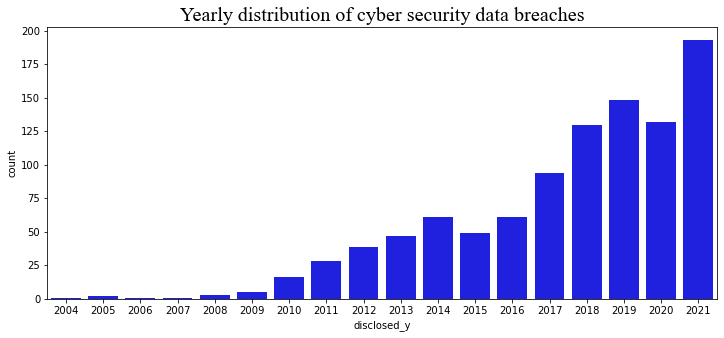

In [29]:
fig= plt.figure(figsize=(12,5))
sns.countplot(data=df, x='disclosed_y', color='b')
plt.title("Yearly distribution of cyber security data breaches", fontsize=20, fontname='Times New Roman')
plt.show()

In [10]:
df.info_type.value_counts()

Personal         505
Financial        287
Other            132
Not Disclosed     87
Name: info_type, dtype: int64

In [11]:
df.attack_type.value_counts()

|Not Disclosed|                           316
|Unauthorized Access|                     211
|Malware|                                 166
|Phishing|                                131
|Ransomware|                               99
|Misconfiguration|                         84
|Malware|Phishing|                          2
|Misconfiguration|Unauthorized Access|      1
|Phishing|Unauthorized Access|              1
Name: attack_type, dtype: int64

In [12]:
df.source.value_counts()

Non-SEC    821
SEC        190
Name: source, dtype: int64

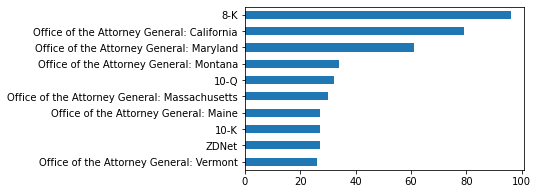

In [23]:
df.file_type.value_counts().head(10).sort_values().plot(kind='barh', figsize= (5,3))
plt.show()

-------------------